# <span style="font-family:serif;font-size:28px;">Contents</span>
1. [Introduction](#1)
2. [Loading Libraries](#2)
3. [Importing Dataset](#3)
4. [Categorical columns](#4)
5. [Univariate Categorical Columns Analysis](#5)
6. [Numerical Columns](#6)
7. [Univariate Numerical Analysis](#7)
8. [Outliers Analysis](#8)
9. [Correlation Matrix](#9)
10. [Heatmap](#10)
11. [Standardization](#11)
12. [Converting Categorical to Numerical](#12)

<a id='1'></a>
## 1. Introduction

<a id='2'></a>
#### Telecom Dataset
**38 Columns**


<a id="2"></a>
## 2. Loading Libraries

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='3'></a>
## 3. Importing Dataset

In [256]:
telecom_df = pd.read_csv('telecom.csv')
telecom_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


***dataset shape***

In [257]:
telecom_df.shape

(7043, 38)

In [258]:
## Drop columns
telecom_df.drop(columns=['City','Customer ID', 'Churn Reason'], inplace = True)

<a id='4'></a>
## 4. Categorical columns

In [259]:
telecom_cat_df = telecom_df.select_dtypes(include='object').columns
telecom_cat_df

Index(['Gender', 'Married', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status',
       'Churn Category'],
      dtype='object')

<a id = '4'></a>
## 4. fill the missing value of categorical columns

In [260]:
telecom_df[telecom_cat_df].isnull().sum()

Gender                       0
Married                      0
Offer                     3877
Phone Service                0
Multiple Lines             682
Internet Service             0
Internet Type             1526
Online Security           1526
Online Backup             1526
Device Protection Plan    1526
Premium Tech Support      1526
Streaming TV              1526
Streaming Movies          1526
Streaming Music           1526
Unlimited Data            1526
Contract                     0
Paperless Billing            0
Payment Method               0
Customer Status              0
Churn Category            5174
dtype: int64

Here missing columns are offer
- Multiple Lines
- Internet Types
- Online Security 
- Online Backup 
- Device Protection Plan 
- Premium Tech Support
- Streaming TV 
- Streaming Movies
- Streaming Music
- Unlimited Data
- Churn Category
- Churn Reason

***We can fill the all categorical Variable missing value with their mode***

In [261]:
def fill_missing_categorical(df):
    mode_value = df.mode()[0]
    return df.fillna(mode_value)

telecom_df[telecom_cat_df] = telecom_df[telecom_cat_df].apply(fill_missing_value_categorical)
telecom_df[telecom_cat_df].isnull().sum()

Gender                    0
Married                   0
Offer                     0
Phone Service             0
Multiple Lines            0
Internet Service          0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
Customer Status           0
Churn Category            0
dtype: int64

<a id='5'></a>
## 5. Univariate Categorical Columns Analysis

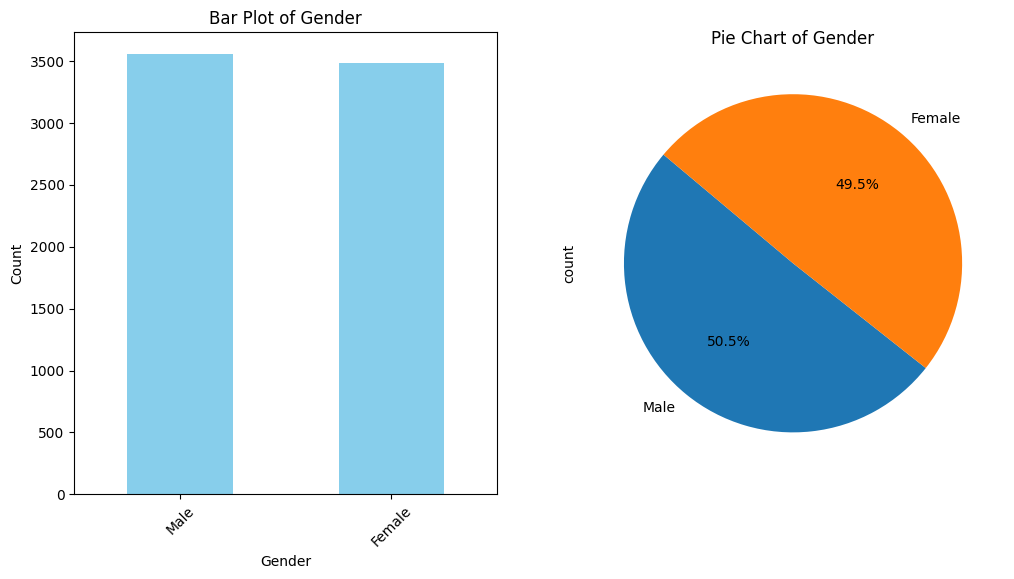

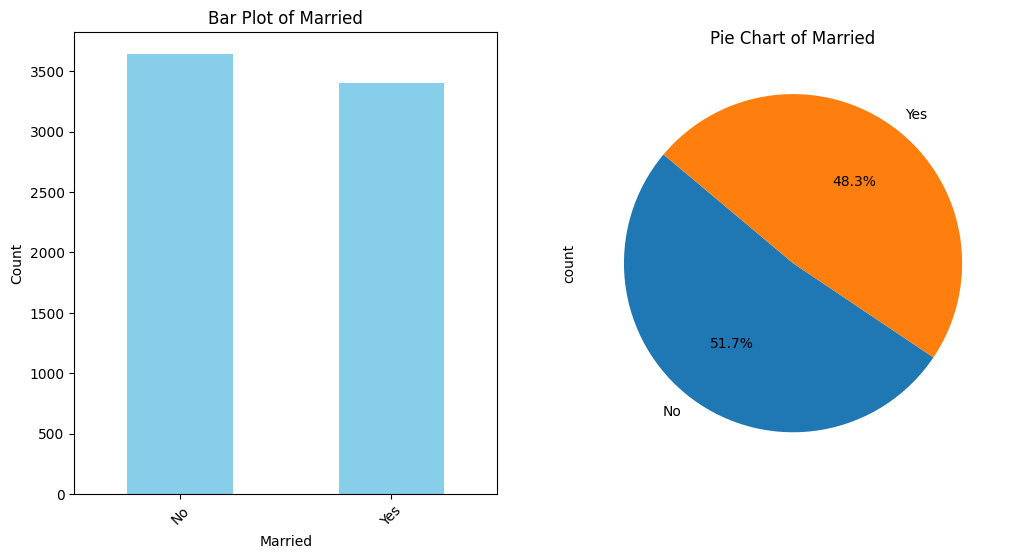

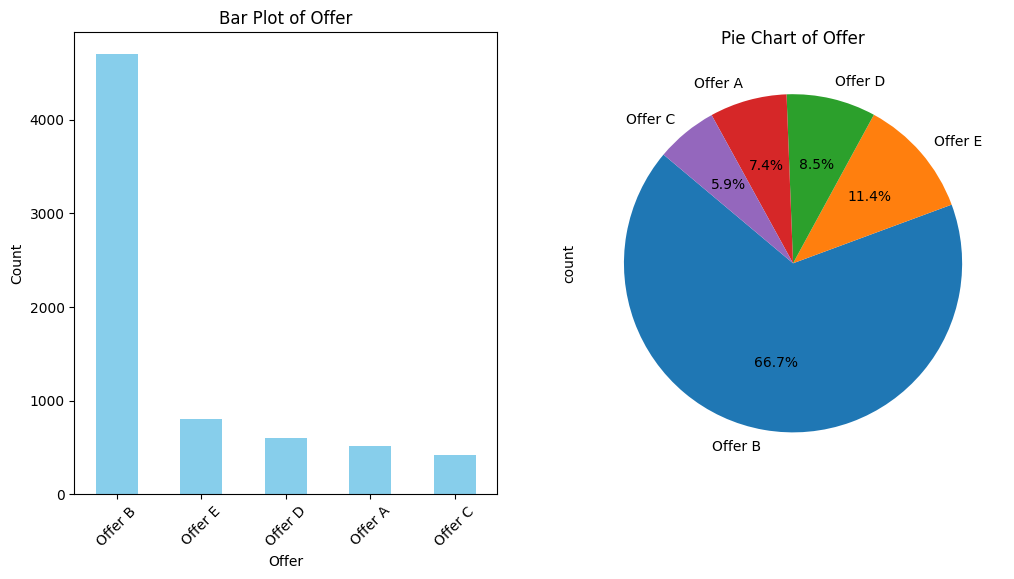

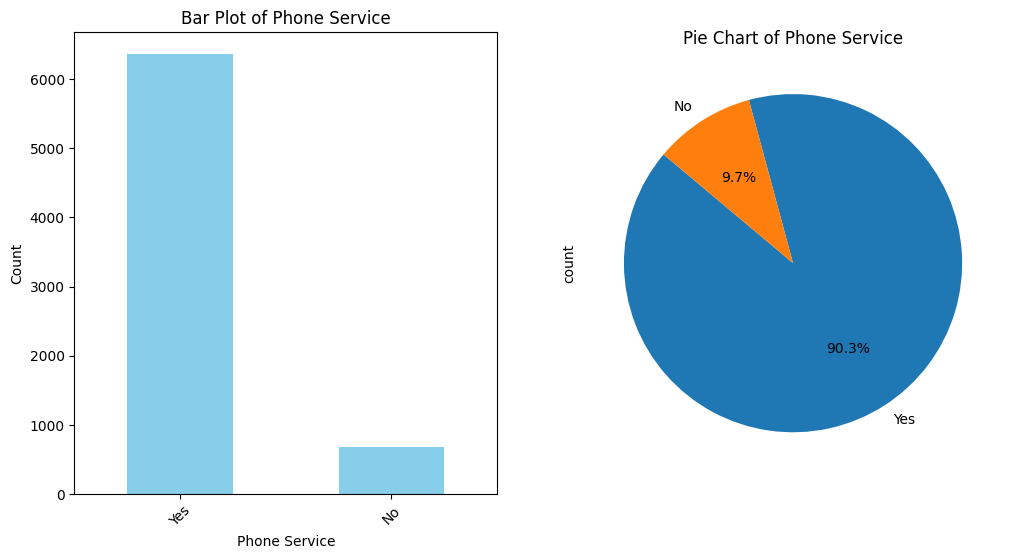

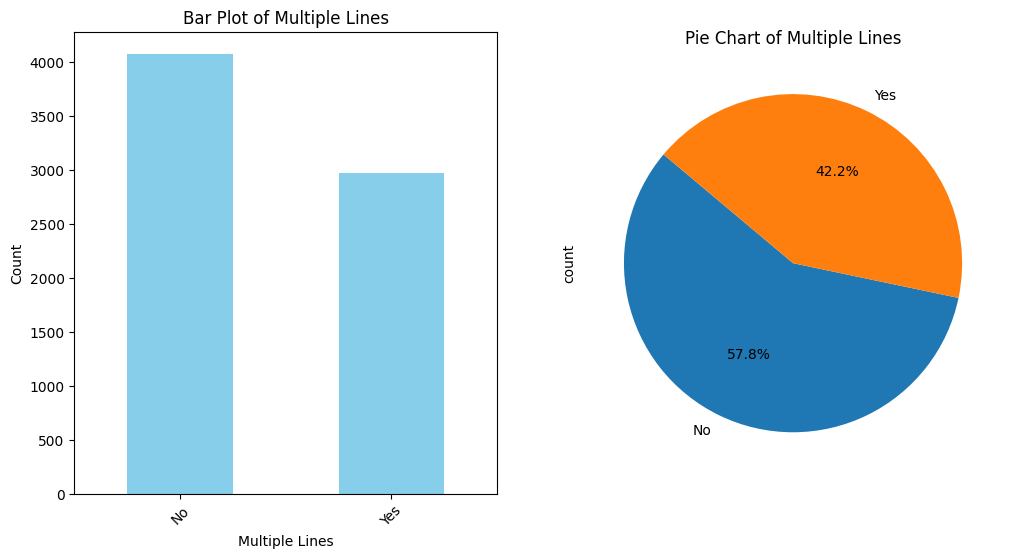

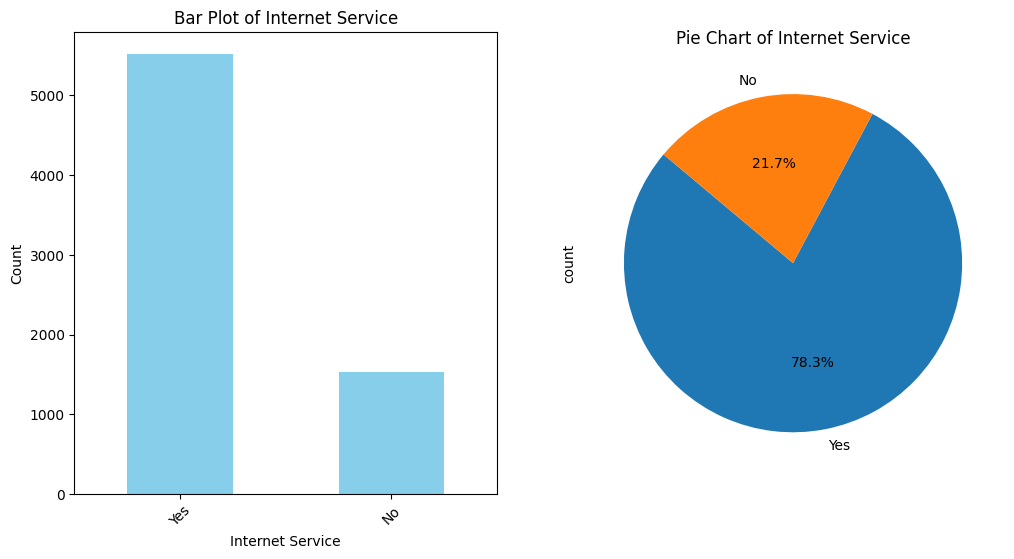

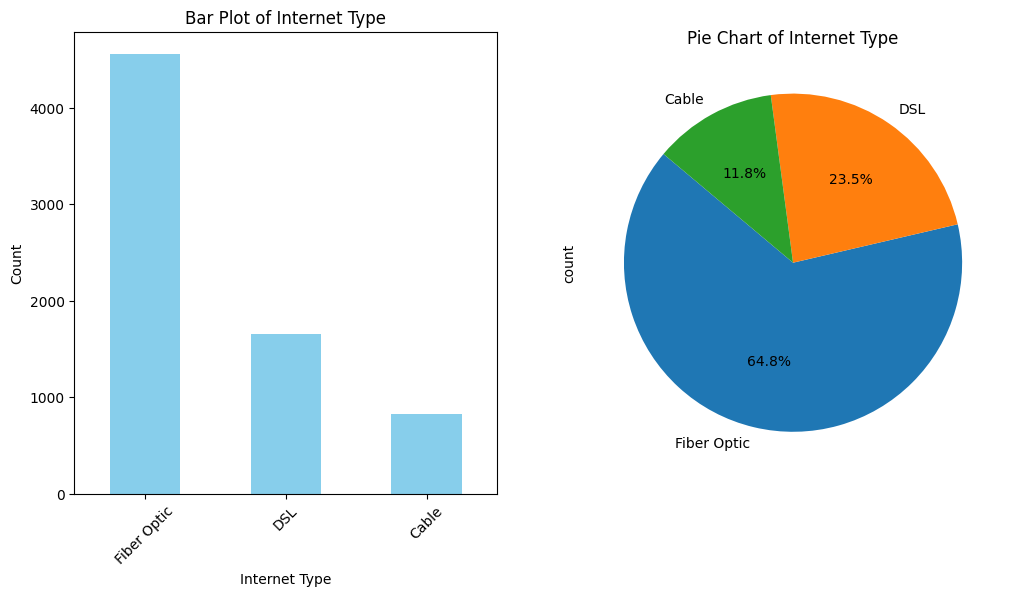

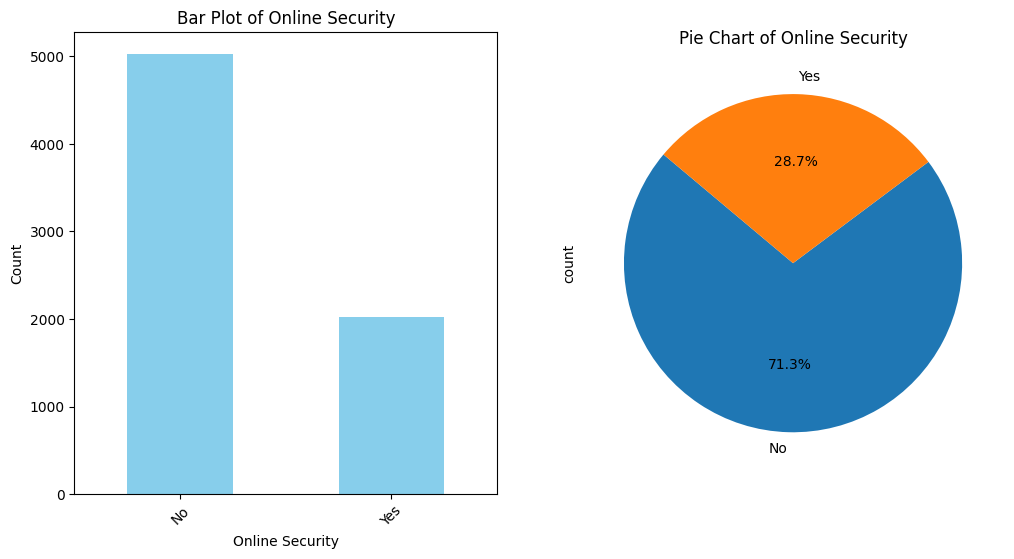

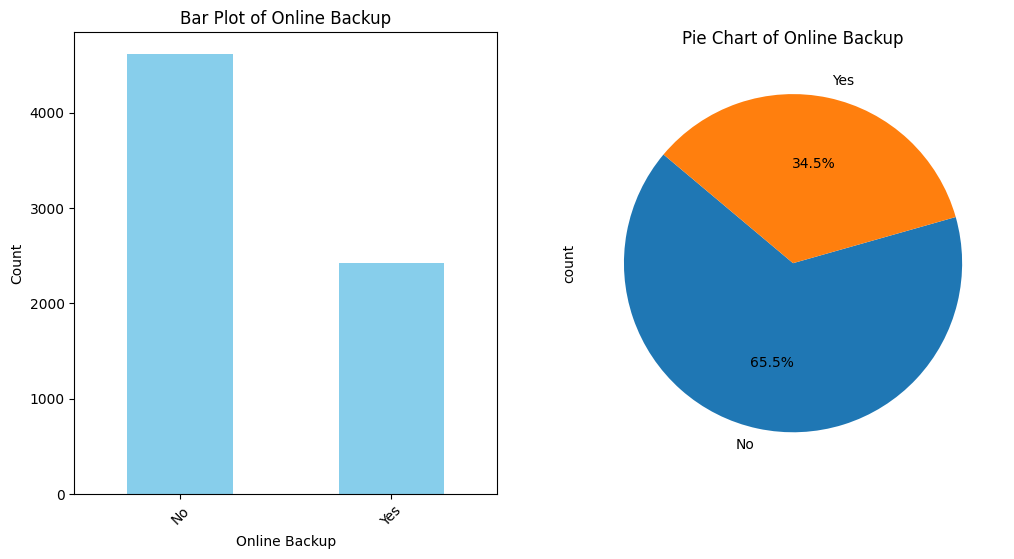

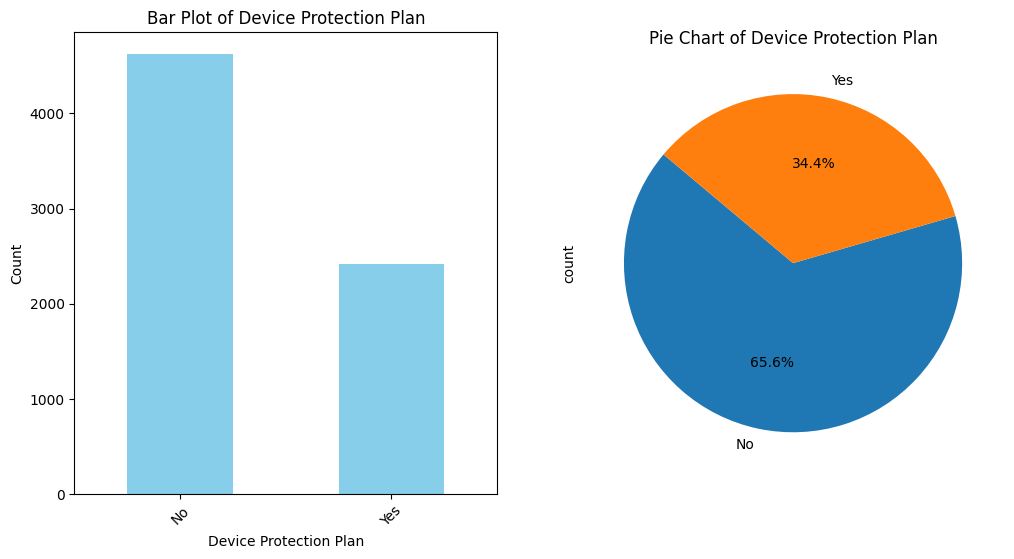

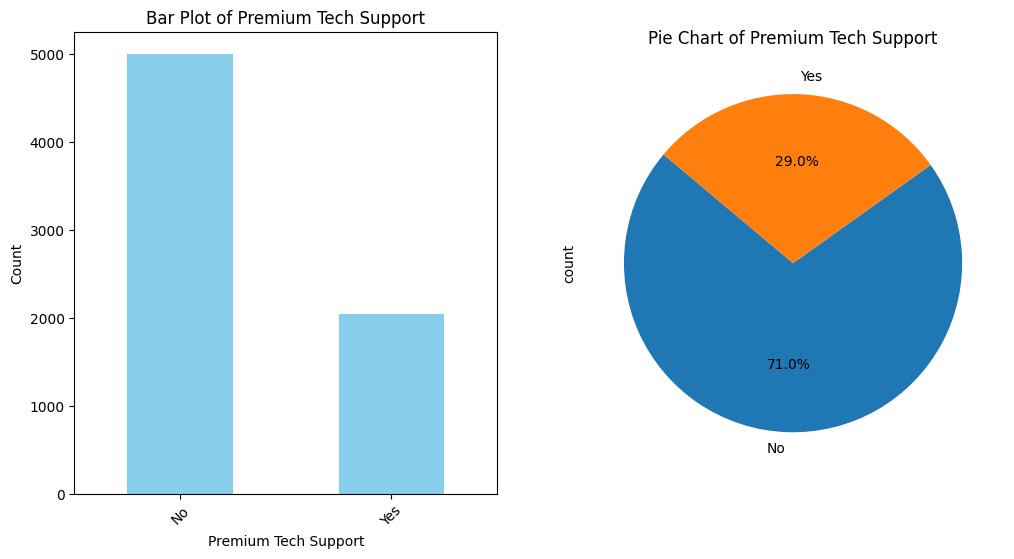

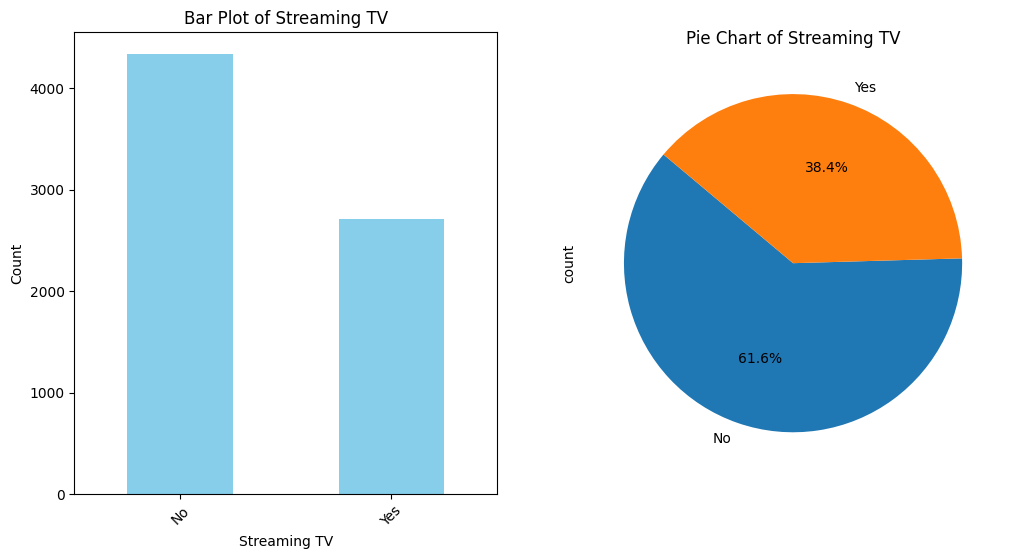

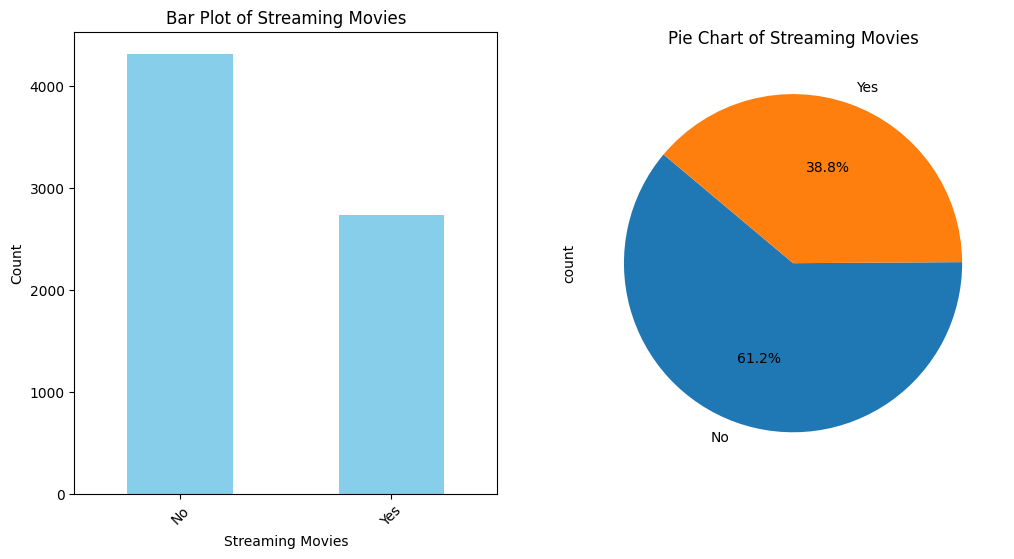

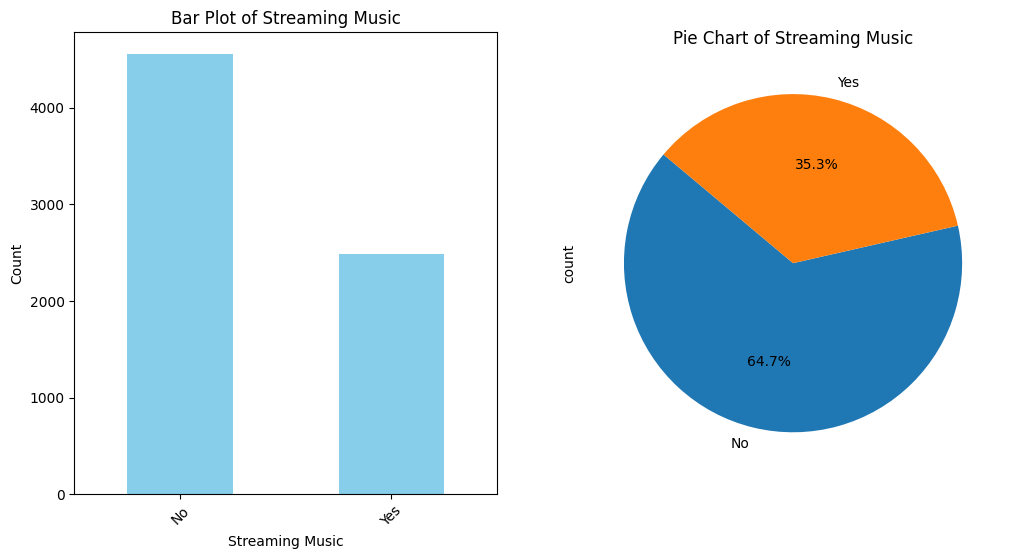

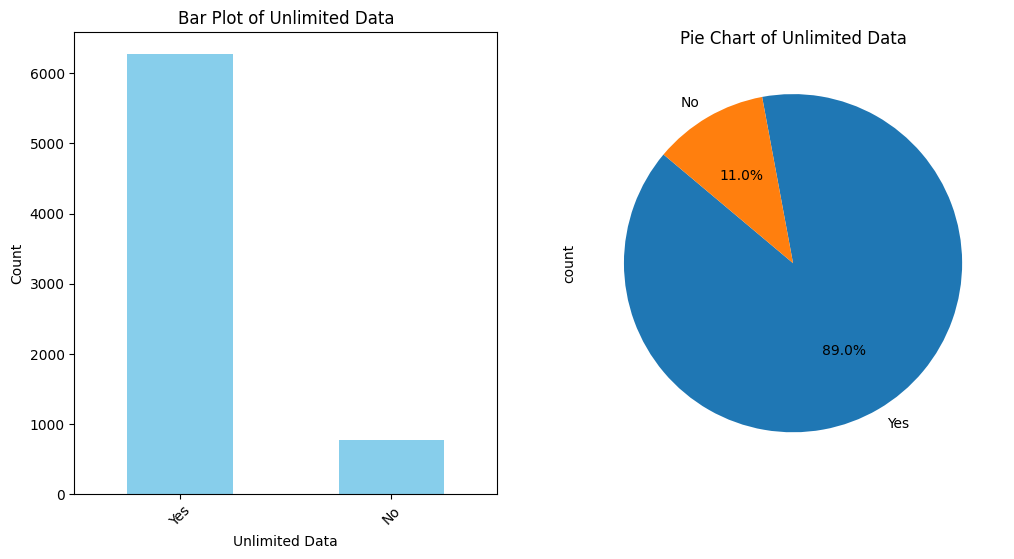

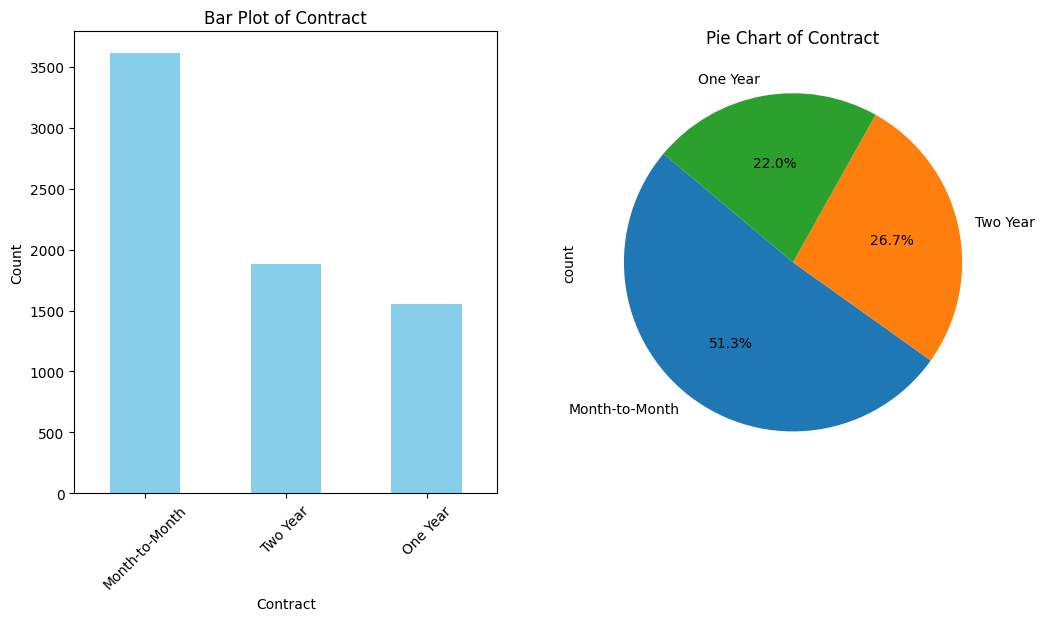

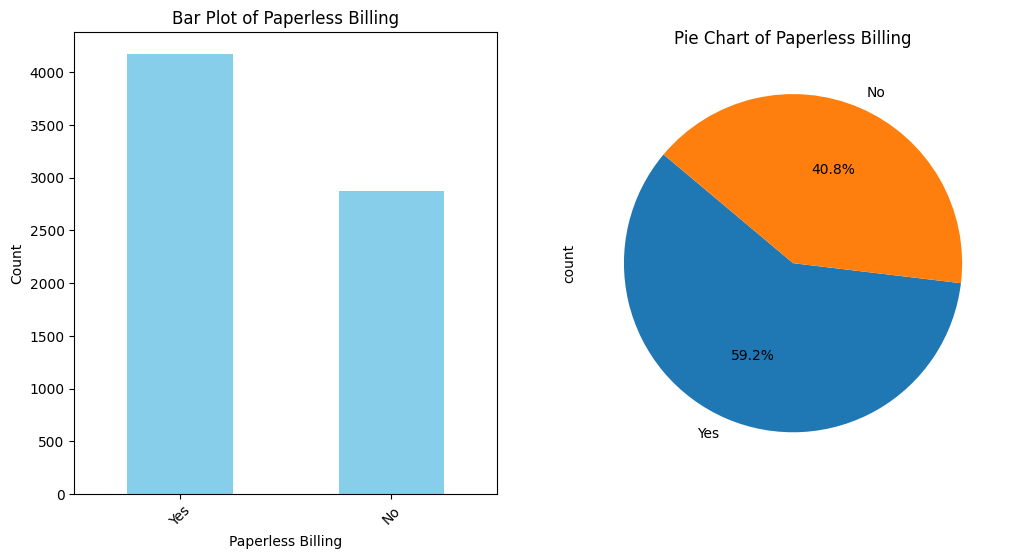

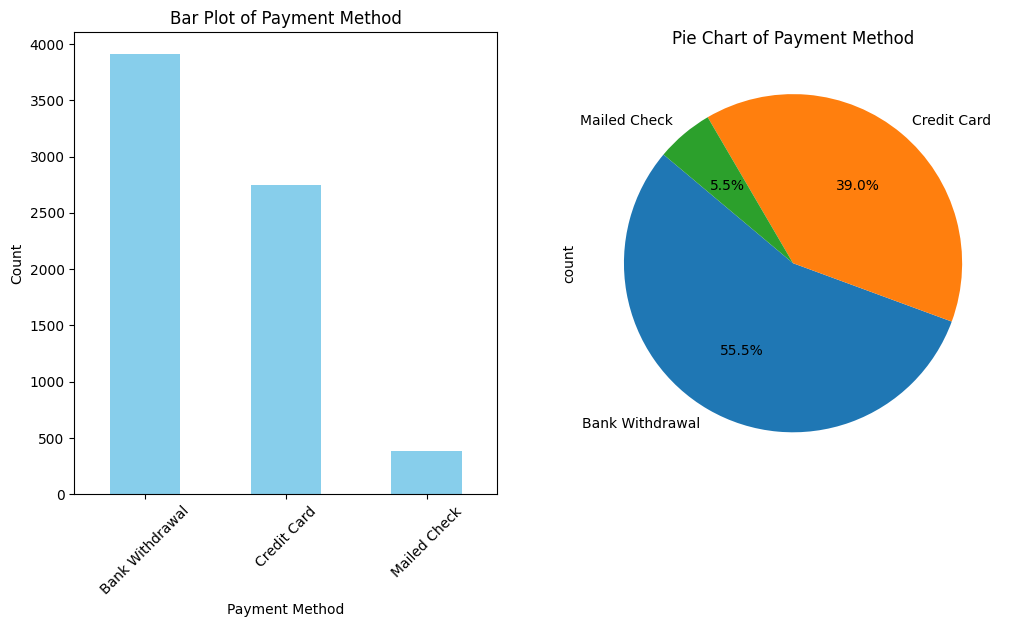

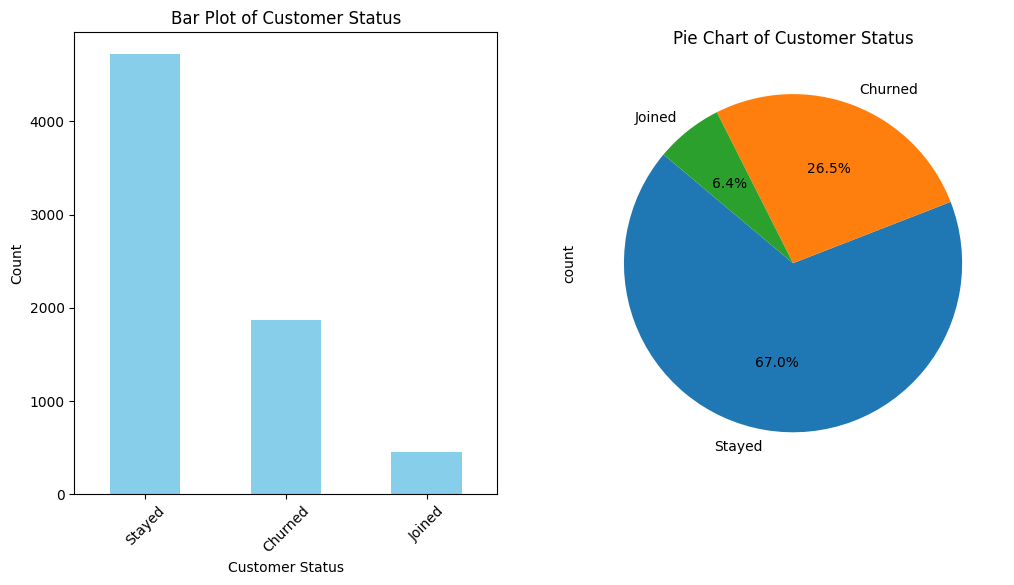

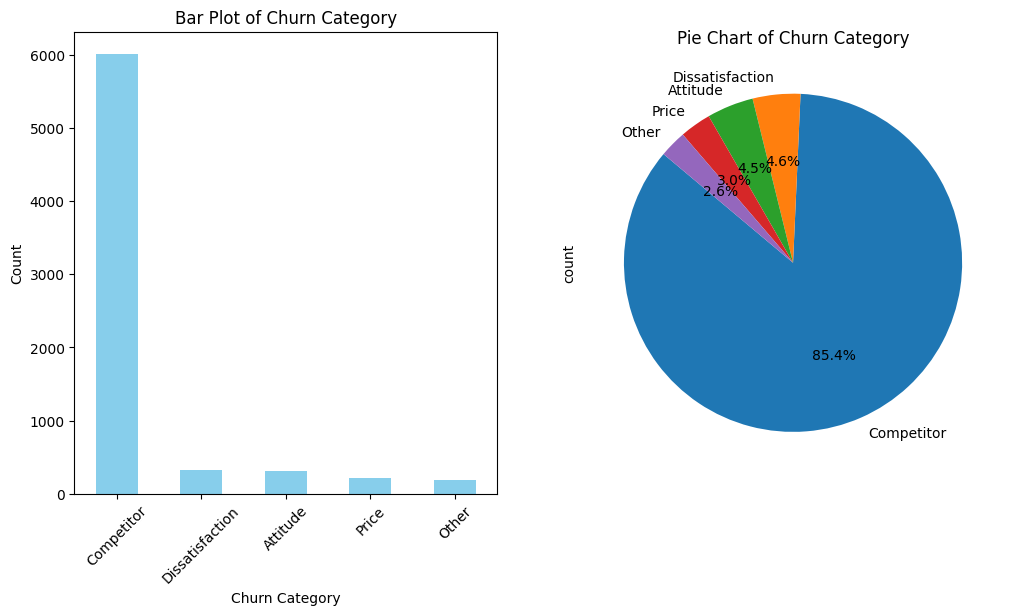

In [262]:
def plot_categorical_columns(df, categorical_columns):
    for column in categorical_columns:
        # Count values in the column
        value_counts = df[column].value_counts()

        # Create a new figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot bar plot
        value_counts.plot(kind='bar', ax=ax1, color='skyblue')
        ax1.set_title(f'Bar Plot of {column}')
        ax1.set_xlabel(column)
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)

        # Plot pie chart
        value_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=140)
        ax2.set_title(f'Pie Chart of {column}')

        plt.show()
plot_categorical_columns(telecom_df, telecom_cat_df)

<a id='6'></a>
## 6. Numerical Columns

In [263]:
telecom_df[telecom_num_df].isnull().sum()

Age                                     0
Number of Dependents                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     682
Avg Monthly GB Download              1526
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
dtype: int64

**fill missing numerical values** <br>
***two missing numerical column are present***
- Avg Monthly Long Distance Charges
- Avg Monthly GB Download 

In [264]:
telecom_df['Avg Monthly GB Download'].fillna(telecom_df['Avg Monthly GB Download'].median(), inplace = True)
telecom_df['Avg Monthly Long Distance Charges'].fillna(telecom_df['Avg Monthly Long Distance Charges'].median(), inplace = True)

<a id='7'></a>
## 7.  Univariate Numerical Analysis

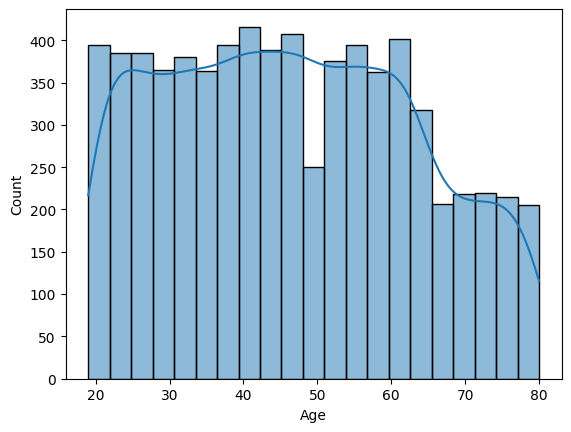

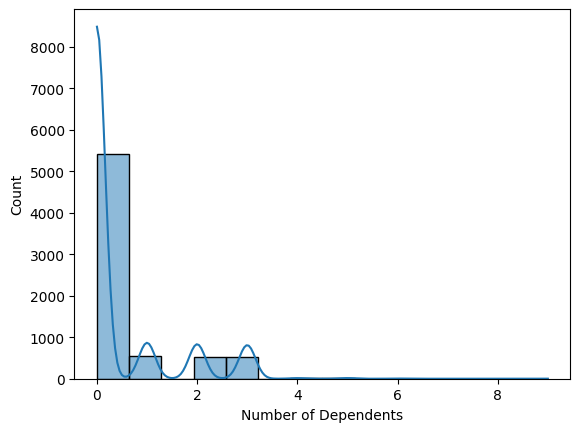

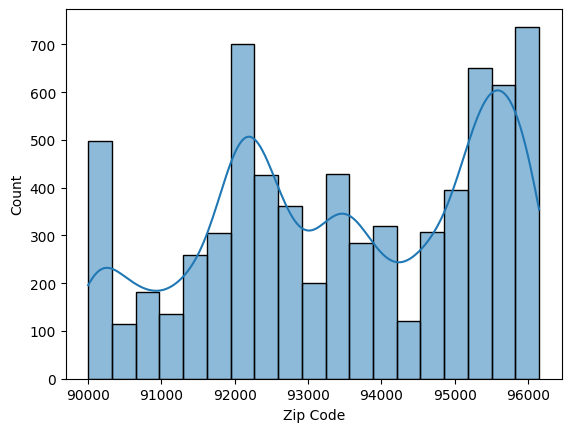

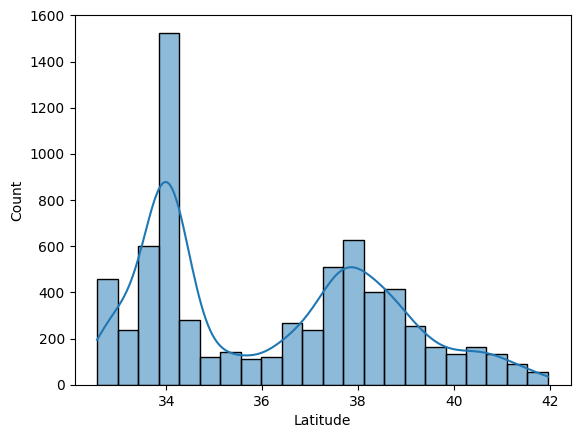

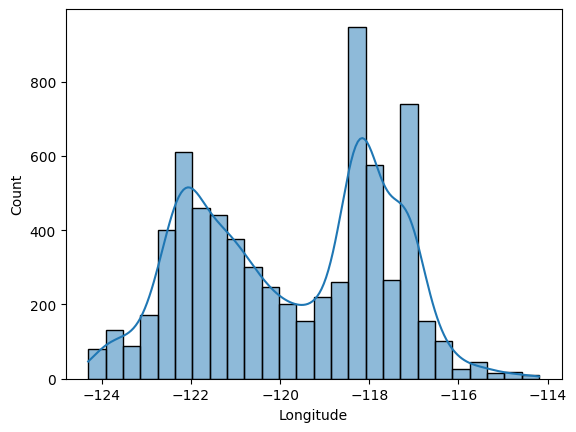

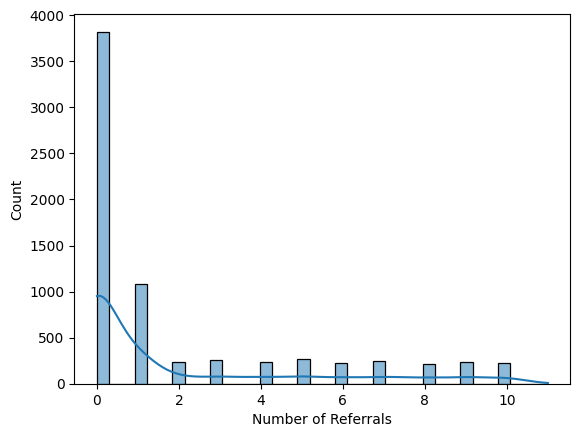

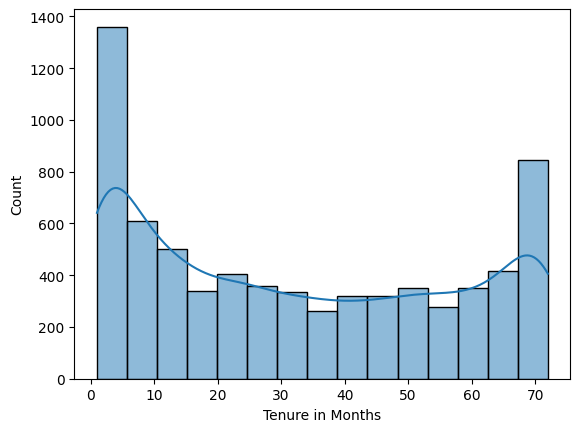

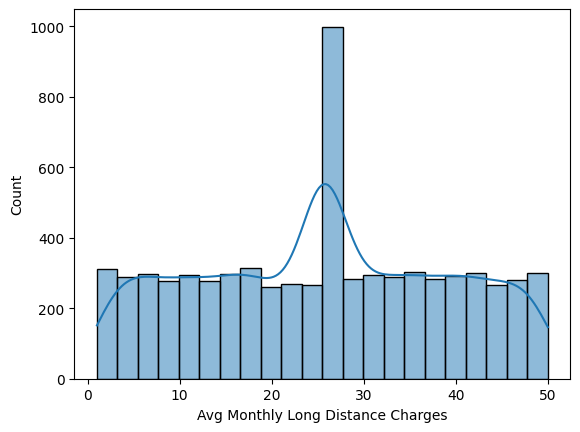

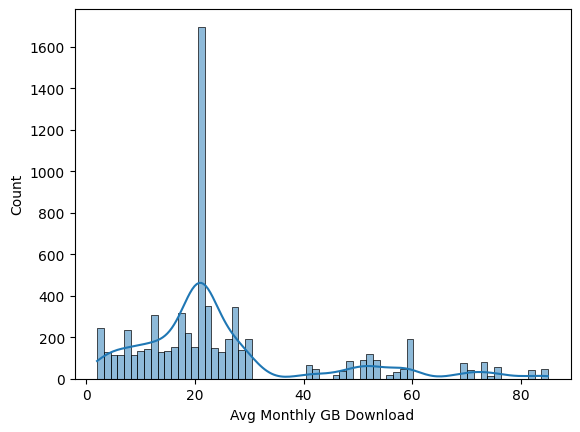

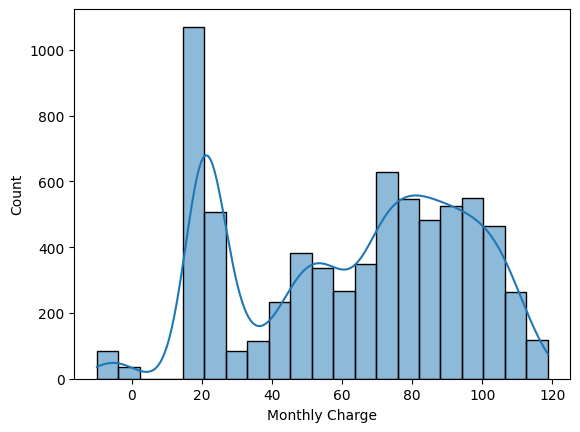

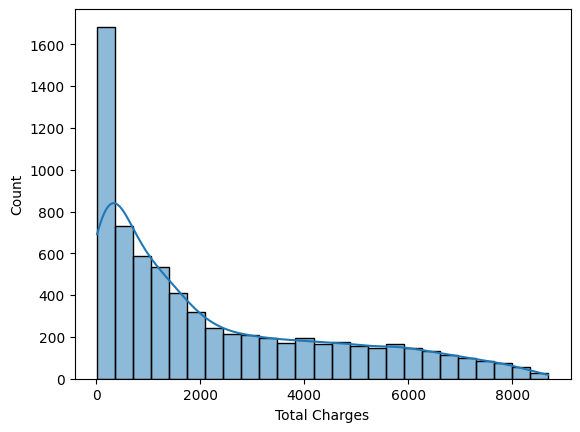

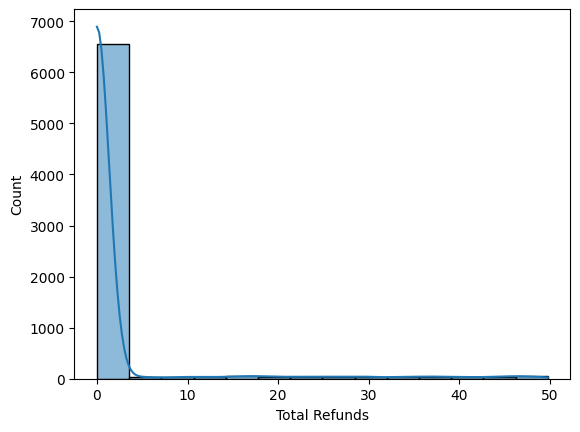

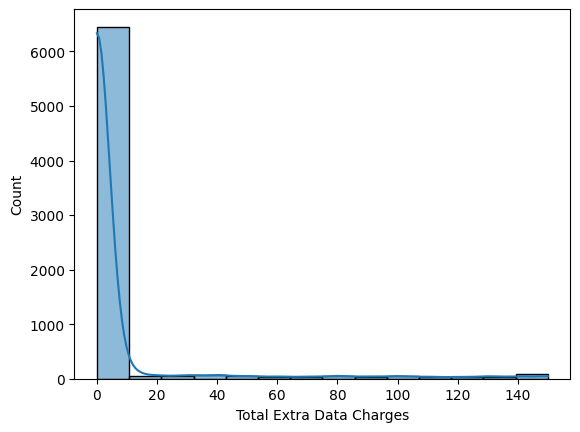

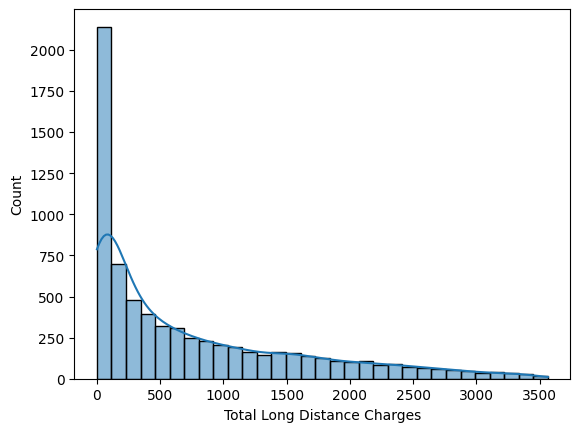

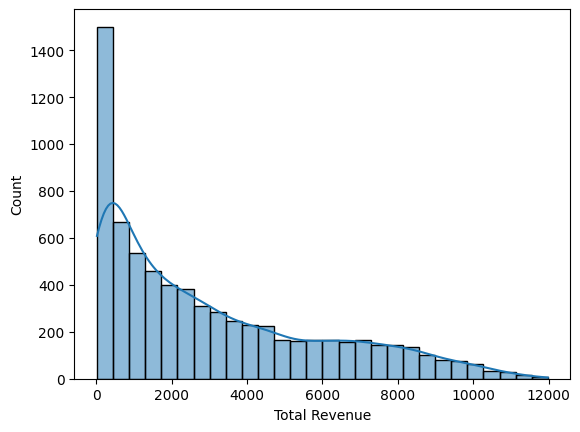

In [265]:
def plot_histogram(col, df):
    sns.histplot(df,kde = True)
    plt.xlabel(col)
    plt.show()

for column in telecom_num_df:
    plot_histogram(column, telecom_df[column])

<a id='8' ></a>
## 8. Outliers Analysis

In [266]:
outlier_list = []
def outliers(col):
    global UB, LB
    Q1 = np.quantile(telecom_df[col], 0.25)
    Q2 = np.quantile(telecom_df[col], 0.50)
    Q3 = np.quantile(telecom_df[col], 0.75)
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    con1 = telecom_df[col]>UB
    con2 = telecom_df[col]<LB
    outliers_df = telecom_df[con1 | con2]
    print(f"{col} has {len(outliers_df)} outliers")
    if len(outliers_df)>0:
        outlier_list.append(col)

for column in telecom_num_df:
    outliers(column)

Age has 0 outliers
Number of Dependents has 1627 outliers
Zip Code has 0 outliers
Latitude has 0 outliers
Longitude has 0 outliers
Number of Referrals has 676 outliers
Tenure in Months has 0 outliers
Avg Monthly Long Distance Charges has 0 outliers
Avg Monthly GB Download has 1089 outliers
Monthly Charge has 0 outliers
Total Charges has 0 outliers
Total Refunds has 525 outliers
Total Extra Data Charges has 728 outliers
Total Long Distance Charges has 196 outliers
Total Revenue has 21 outliers


***from the above conclusion we conclude that columns contains outliers are***
- Number of Dependents 
- Number of Referrals
- Avg Monthly GB Download
- Total Refunds
- Total Extra Data Charges
- Total Long Distance Charges
- Total Revenue


***boxplot of outliers***

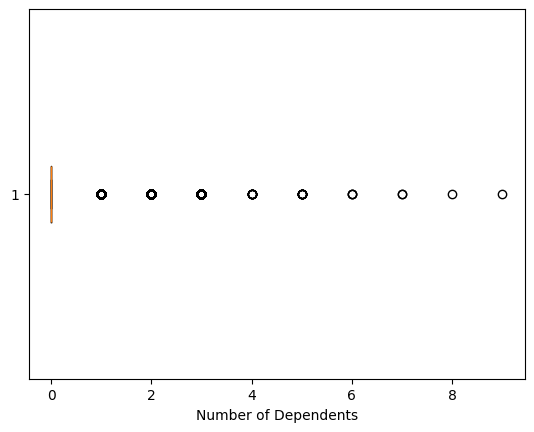

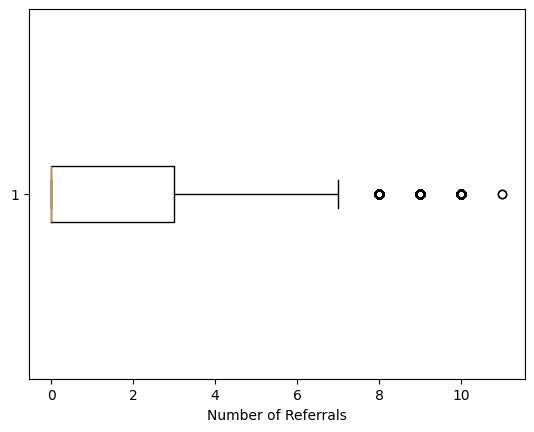

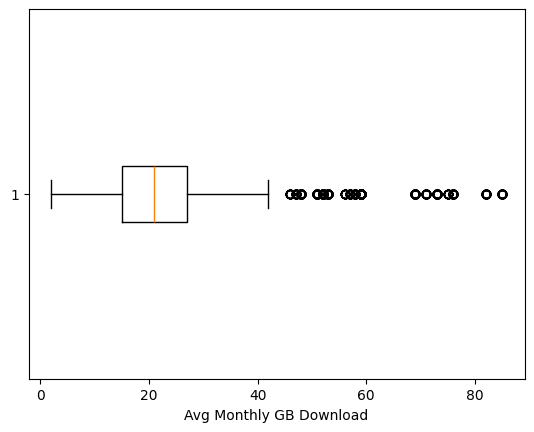

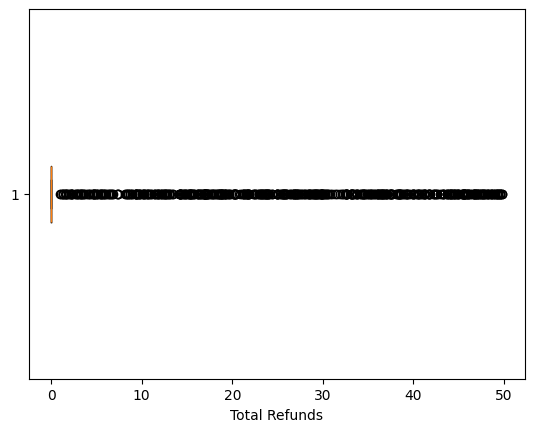

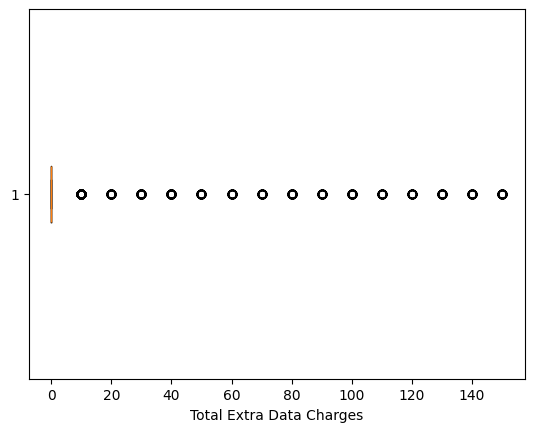

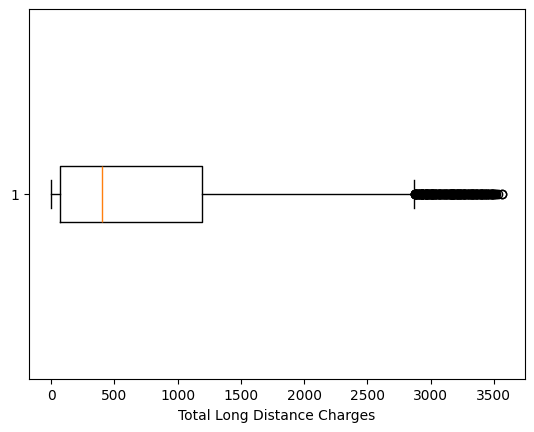

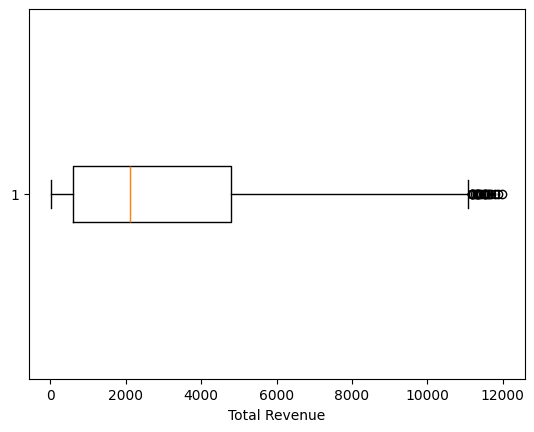

In [267]:
def plot_boxplot(col):
    plt.boxplot(telecom_df[col], vert = False)
    plt.xlabel(col)
    plt.show()

for col in outlier_list:
    plot_boxplot(col)

***Cap the outlier with Upper and Lower bound***

In [268]:
def outlier_removal(col):
    telecom_df[col] = np.where(telecom_df[col]>UB, UB, telecom_df[col])
    telecom_df[col] = np.where(telecom_df[col]<LB, LB, telecom_df[col])


for col in outlier_list:
    outlier_removal(col)

<a id='9'></a>
## 9. Correlation Matrix

In [269]:
telecom_df.corr(numeric_only=True)

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.019059,-0.498385,0.134511,0.059684,0.024168,0.025036,0.003065,0.048296
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002670,0.227794,-0.125649,0.022535,0.014023,-0.014436,0.068966,0.038127
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.011718,-0.004557,-0.002517,0.001978,-0.003797,-0.014550,0.005063,0.002874
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.013814,-0.015957,-0.021613,-0.002784,-0.009901,-0.013233,0.008029,-0.000058
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.014743,0.017884,0.021052,0.003811,-0.000597,0.010461,-0.006923,0.001284
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001653,0.064407,0.026301,0.250378,0.024756,0.000350,0.216190,0.261992
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012051,0.038310,0.239065,0.826074,0.059021,0.082266,0.674149,0.853483
Avg Monthly Long Distance Charges,-0.019059,-0.002670,0.011718,0.013814,-0.014743,0.001653,0.012051,1.000000,0.017746,0.017072,0.015878,-0.024906,0.020002,0.523502,0.167091
Avg Monthly GB Download,-0.498385,0.227794,-0.004557,-0.015957,0.017884,0.064407,0.038310,0.017746,1.000000,0.076916,0.075118,-0.007360,0.032773,0.019798,0.065699
Monthly Charge,0.134511,-0.125649,-0.002517,-0.021613,0.021052,0.026301,0.239065,0.017072,0.076916,1.000000,0.622810,0.023963,0.121238,0.235685,0.563253


<a id='10'></a>
## 10. Heatmap

<Axes: >

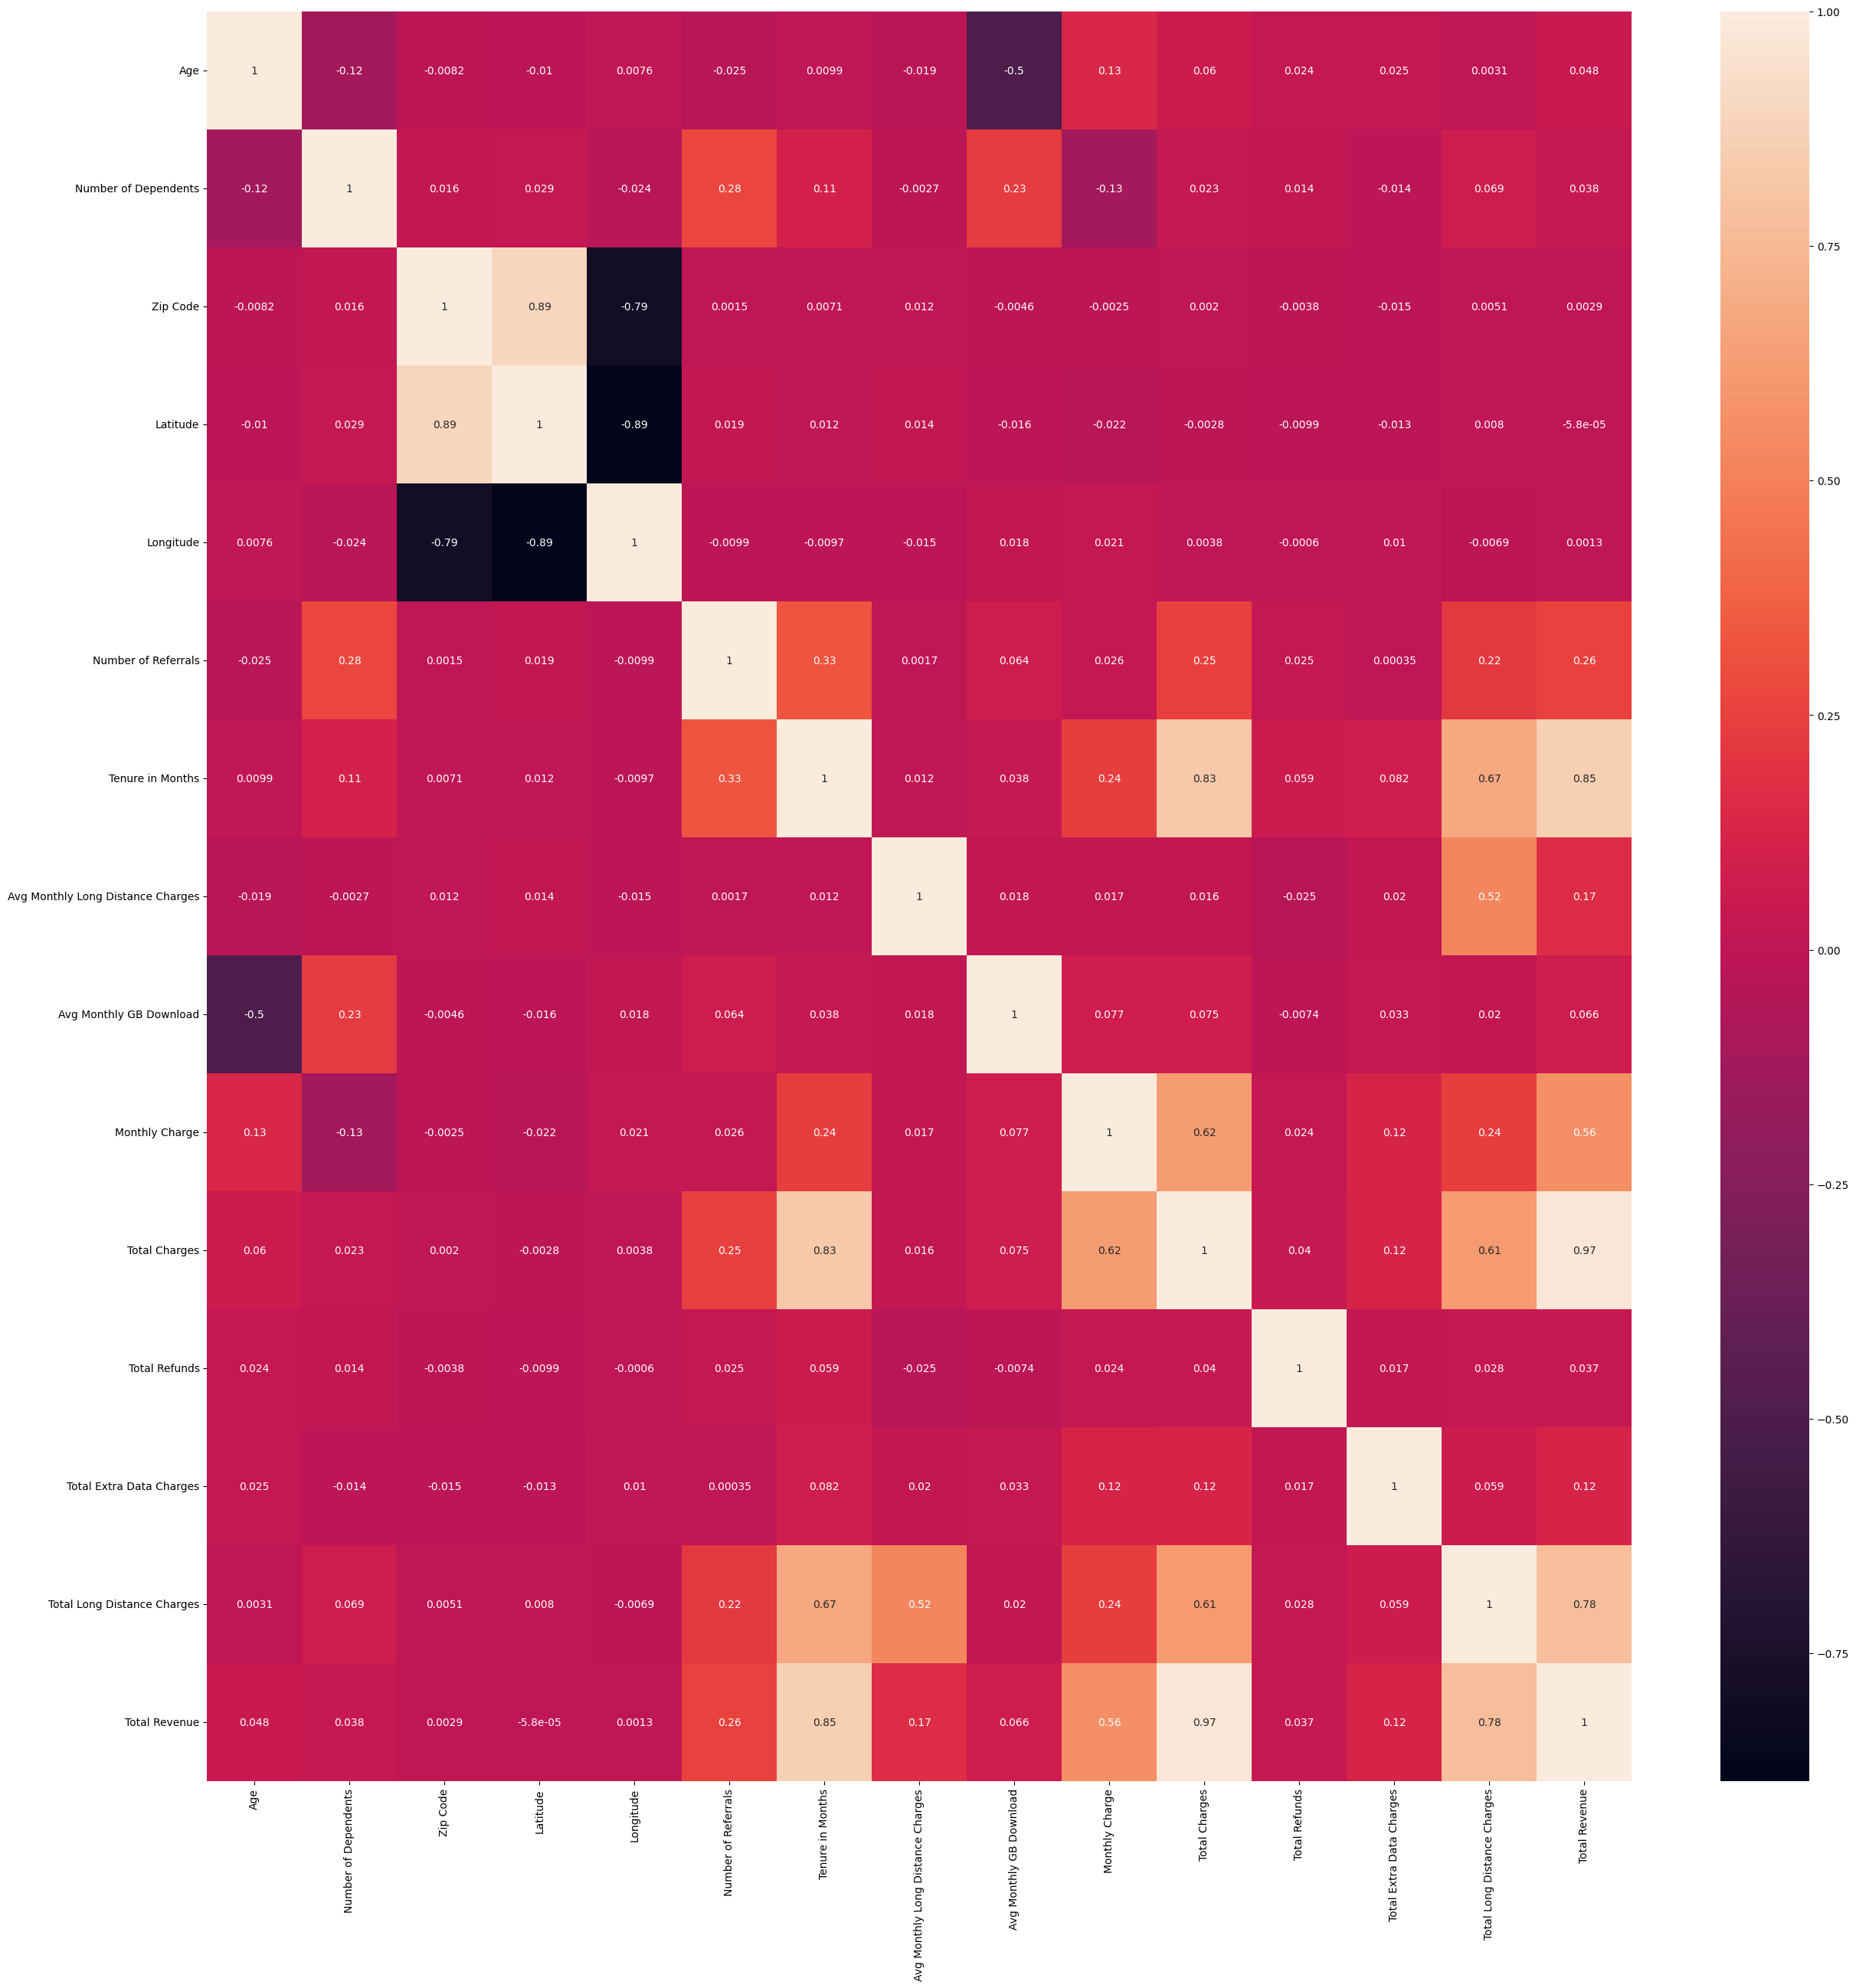

In [270]:
plt.figure(figsize=(30,30))
corr = telecom_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

<a id = '11'></a>
## 11. Standardization

In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
telecom_df[telecom_num_df] = scaler.fit_transform(telecom_df[telecom_num_df])
telecom_df.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category
0,Female,-0.567773,Yes,-0.486835,-0.140615,-0.554852,0.351678,0.016039,-0.952994,Offer B,...,Yes,Credit Card,0.064221,-0.744500,-0.248313,-0.273300,-0.434195,-0.719294,Stayed,Competitor
1,Male,-0.030433,No,-0.486835,-1.228066,-0.824278,0.720807,-0.650409,-0.952994,Offer B,...,No,Credit Card,-2.166367,-0.766962,4.602325,0.125055,-0.771190,-0.846672,Stayed,Competitor
2,Male,0.208385,No,-0.486835,-0.462703,-1.033632,0.851364,-0.650409,-1.156740,Offer E,...,Yes,Bank Withdrawal,0.330225,-0.882382,-0.248313,-0.273300,-0.725844,-0.914752,Churned,Competitor
3,Male,1.880110,Yes,-0.486835,0.574657,0.736000,-1.094917,-0.317185,-0.789997,Offer D,...,Yes,Bank Withdrawal,1.102599,-0.460063,-0.248313,-0.273300,-0.457641,-0.501003,Churned,Dissatisfaction
4,Female,1.700997,Yes,-0.486835,-0.256416,-0.797815,0.314157,0.349263,-1.197489,Offer B,...,Yes,Credit Card,0.650712,-0.888318,-0.248313,-0.273300,-0.858681,-0.958749,Churned,Dissatisfaction


<a id = '12'></a>
## 12. Converting Categorical to Numerical

In [272]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = telecom_df.select_dtypes(include = 'object').columns

for i in cat_cols:
    telecom_df[i]= le.fit_transform(telecom_df[i])

In [273]:
telecom_df.head()

,Gender,Age,Married,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category
0,0,-0.567773,1,-0.486835,-0.140615,-0.554852,0.351678,0.016039,-0.952994,1,...,1,1,0.064221,-0.744500,-0.248313,-0.273300,-0.434195,-0.719294,2,1
1,1,-0.030433,0,-0.486835,-1.228066,-0.824278,0.720807,-0.650409,-0.952994,1,...,0,1,-2.166367,-0.766962,4.602325,0.125055,-0.771190,-0.846672,2,1
2,1,0.208385,0,-0.486835,-0.462703,-1.033632,0.851364,-0.650409,-1.156740,4,...,1,0,0.330225,-0.882382,-0.248313,-0.273300,-0.725844,-0.914752,0,1
3,1,1.880110,1,-0.486835,0.574657,0.736000,-1.094917,-0.317185,-0.789997,3,...,1,0,1.102599,-0.460063,-0.248313,-0.273300,-0.457641,-0.501003,0,2
4,0,1.700997,1,-0.486835,-0.256416,-0.797815,0.314157,0.349263,-1.197489,1,...,1,1,0.650712,-0.888318,-0.248313,-0.273300,-0.858681,-0.958749,0,2
